# Basic setup template for API pull and dataframe to run MC Sim

In [1]:
# # imports for the API key retrevial
# import requests
# from dotenv import load_dotenv
# import os 

# # Load .env enviroment variables
# from dotenv import load_dotenv
# load_dotenv()

# Use the os.getenv function to retrieve the environment variable named FRED_API_KEY
# Store as a Python variable named api_key
# api_key = os.getenv("FRED_API_KEY")
# type(api_key)


# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# For basic plot
%matplotlib inline

# MC Simulation import -- MUST HAVE MCForecastTools.py in folder working with, possible restart kernal
from MCForecastTools import MCSimulation

# If get a ton of warning when run MC sim --can use this to ignore
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Setup Alpaca API environment
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

## Pull data & put into DF

In [4]:
# Set timeframe to "1Day" ---this is the period how data is aggregated
timeframe = "1Day"

# Set start and end datetimes between now and 4 years ago.
start_date = pd.Timestamp("2019-01-25", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-25", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["T","NKE","XOM"]

# Get 4 year's worth of historical price data
# HINT: Set "limit" to at least 10000 so all ticker rows are captured from get_bars()
df_ticker = api.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-01-25 05:00:00+00:00,81.25,81.3319,80.4300,80.61,4457952,31250,80.745272,NKE
2019-01-28 05:00:00+00:00,79.80,80.5050,79.7400,80.32,5456971,37405,80.201284,NKE
2019-01-29 05:00:00+00:00,80.36,80.8300,79.8400,80.22,4187527,33346,80.242918,NKE
2019-01-30 05:00:00+00:00,80.40,81.2900,80.0601,81.28,5202758,38746,80.733010,NKE
2019-01-31 05:00:00+00:00,81.18,81.9500,80.7100,81.88,8599206,48171,81.601459,NKE
...,...,...,...,...,...,...,...,...
2023-01-19 05:00:00+00:00,110.07,112.1300,109.5800,111.32,12928169,114721,110.957669,XOM
2023-01-20 05:00:00+00:00,111.36,113.4400,110.6100,113.35,16515614,124370,112.396898,XOM
2023-01-23 05:00:00+00:00,113.64,114.5900,112.6400,112.76,16585197,126498,113.539285,XOM


## Now need to re-org data to correct format for the MC Sim Class in MCForecastTools.py

In [5]:
# Reorganize the DataFrame
# Separate ticker data
T = df_ticker[df_ticker["symbol"]=="T"].drop("symbol", axis=1)
NKE = df_ticker[df_ticker["symbol"]=="NKE"].drop("symbol", axis=1)
XOM = df_ticker[df_ticker["symbol"]=="XOM"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames --keys parm separates each set of data by ticker -- 
# where the ticker is = end of that data horizontally in df display
df_ticker = pd.concat([T, NKE, XOM], axis=1, keys=["T","NKE","XOM"])

# Display sample data
df_ticker.head()

T                                               \
                            open    high     low  close    volume trade_count   
timestamp                                                                       
2019-01-25 05:00:00+00:00  30.68  31.035  30.640  30.66  30511165       87128   
2019-01-28 05:00:00+00:00  30.62  30.680  30.430  30.67  31028673       94585   
2019-01-29 05:00:00+00:00  30.62  30.700  30.450  30.70  31343325      102870   
2019-01-30 05:00:00+00:00  29.96  30.400  29.010  29.37  92971028      289522   
2019-01-31 05:00:00+00:00  29.50  30.090  29.145  30.06  52177800      139778   

                                        NKE                    ...           \
                                vwap   open     high      low  ...   volume   
timestamp                                                      ...            
2019-01-25 05:00:00+00:00  30.795024  81.25  81.3319  80.4300  ...  4457952   
2019-01-28 05:00:00+00:00  30.563724  79.80  80.5050  79.7400  ...  5456971   
2019-01-29 05:00:00+00:00  30.584150  80.36  80.8300  79.8400  ...  4187527   
2019-01-30 05:00:00+00:00  29.340005  80.40  81.2900  80.0601  ...  5202758   
2019-01-31 05:00:00+00:00  29.794271  81.18  81.9500  80.7100  ...  8599206   

                                                    XOM                        \
                          trade_count       vwap   open   high     low  close   
timestamp                                                                       
2019-01-25 05:00:00+00:00       31250  80.745272  72.07  72.27  71.535  71.72   
2019-01-28 05:00:00+00:00       37405  80.201284  71.02  71.28  70.370  71.24   
2019-01-29 05:00:00+00:00       33346  80.242918  71.70  72.19  71.480  71.51   
2019-01-30 05:00:00+00:00       38746  80.733010  71.79  72.57  71.505  72.29   
2019-01-31 05:00:00+00:00       48171  81.601459  72.29  73.49  72.020  73.28   

                                                            
                             volume trade_count       vwap  
timestamp                                                   
2019-01-25 05:00:00+00:00   8998698       54193  71.826359  
2019-01-28 05:00:00+00:00  13678634       67873  70.987795  
2019-01-29 05:00:00+00:00  10513242       58012  71.680379  
2019-01-30 05:00:00+00:00  11616487       68050  72.108193  
2019-01-31 05:00:00+00:00  19876726       94636  72.822425  

[5 rows x 21 columns]

## Setup and Run Monte Carlo Simulation

In [6]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()


T                                               \
                            open    high     low  close    volume trade_count   
timestamp                                                                       
2019-01-25 05:00:00+00:00  30.68  31.035  30.640  30.66  30511165       87128   
2019-01-28 05:00:00+00:00  30.62  30.680  30.430  30.67  31028673       94585   
2019-01-29 05:00:00+00:00  30.62  30.700  30.450  30.70  31343325      102870   
2019-01-30 05:00:00+00:00  29.96  30.400  29.010  29.37  92971028      289522   
2019-01-31 05:00:00+00:00  29.50  30.090  29.145  30.06  52177800      139778   

                                                     NKE           ...  \
                                vwap daily_return   open     high  ...   
timestamp                                                          ...   
2019-01-25 05:00:00+00:00  30.795024          NaN  81.25  81.3319  ...   
2019-01-28 05:00:00+00:00  30.563724     0.000326  79.80  80.5050  ...   
2019-01-29 05:00:00+00:00  30.584150     0.000978  80.36  80.8300  ...   
2019-01-30 05:00:00+00:00  29.340005    -0.043322  80.40  81.2900  ...   
2019-01-31 05:00:00+00:00  29.794271     0.023493  81.18  81.9500  ...   

                                                     XOM                 \
                                vwap daily_return   open   high     low   
timestamp                                                                 
2019-01-25 05:00:00+00:00  80.745272          NaN  72.07  72.27  71.535   
2019-01-28 05:00:00+00:00  80.201284    -0.003598  71.02  71.28  70.370   
2019-01-29 05:00:00+00:00  80.242918    -0.001245  71.70  72.19  71.480   
2019-01-30 05:00:00+00:00  80.733010     0.013214  71.79  72.57  71.505   
2019-01-31 05:00:00+00:00  81.601459     0.007382  72.29  73.49  72.020   

                                                                                
                           close    volume trade_count       vwap daily_return  
timestamp                                                                       
2019-01-25 05:00:00+00:00  71.72   8998698       54193  71.826359          NaN  
2019-01-28 05:00:00+00:00  71.24  13678634       67873  70.987795    -0.006693  
2019-01-29 05:00:00+00:00  71.51  10513242       58012  71.680379     0.003790  
2019-01-30 05:00:00+00:00  72.29  11616487       68050  72.108193     0.010908  
2019-01-31 05:00:00+00:00  73.28  19876726       94636  72.822425     0.013695  

[5 rows x 24 columns]

In [7]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002059,0.990581,0.996986,1.008253,1.009930,0.995897,1.000116,0.986812,1.004429,0.990297,...,0.980041,0.985813,1.007520,0.986881,1.010150,0.994888,1.004090,1.028108,1.019645,0.991740
2,1.012606,0.996262,1.005265,1.001827,1.012998,0.999859,1.006630,0.979694,1.002543,0.975590,...,0.985834,0.979281,1.000868,0.996679,1.011660,0.975036,1.004785,1.014241,1.007050,1.001308
3,1.028339,1.008996,0.999838,1.004886,1.005168,1.039504,1.019324,0.972865,1.008315,0.966169,...,0.989032,0.980811,0.999288,1.000553,1.010775,0.986422,1.012555,1.015014,1.002514,0.980455
4,1.030987,1.005697,1.014090,1.013227,0.996696,1.032285,1.029845,0.955849,1.022155,0.964834,...,0.995950,0.982053,0.984340,0.993679,1.025240,0.970089,1.020972,1.040412,1.007518,1.004466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.957104,1.205392,2.194189,1.573974,1.915029,0.496958,0.965043,1.194419,0.965819,1.277424,...,1.375450,1.975284,2.649343,2.808774,1.494917,1.139643,1.568682,1.140220,1.783505,1.121991
1257,0.945883,1.214285,2.215678,1.577145,1.919208,0.491013,0.977116,1.189739,0.942691,1.309174,...,1.387000,2.009102,2.668265,2.771437,1.488085,1.139046,1.563206,1.142216,1.750450,1.089876
1258,0.953448,1.181291,2.170056,1.557816,1.968687,0.490599,0.969460,1.193155,0.938792,1.317090,...,1.415672,2.008395,2.647368,2.805376,1.476345,1.126393,1.572300,1.122939,1.723820,1.102411
1259,0.962939,1.187735,2.140362,1.531690,1.993011,0.482215,0.975690,1.146830,0.958068,1.315465,...,1.412327,1.984194,2.662842,2.810425,1.450586,1.142330,1.598019,1.110058,1.701686,1.124890


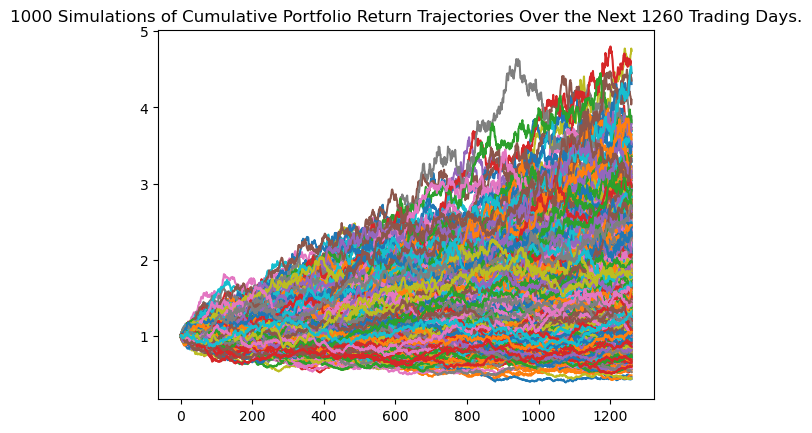

In [11]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

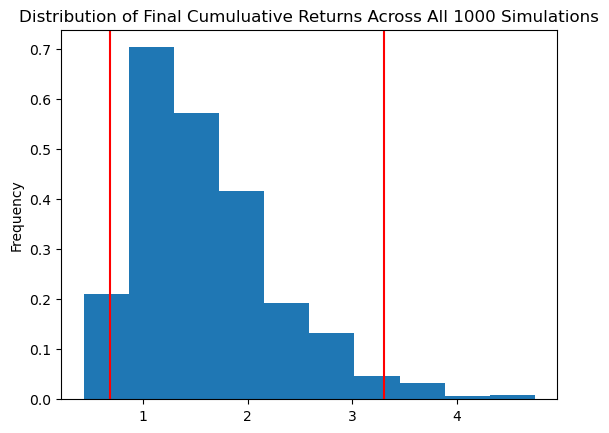

In [12]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [8]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.566385
std                0.684346
min                0.436041
25%                1.101936
50%                1.442743
75%                1.878605
max                6.416701
95% CI Lower       0.657949
95% CI Upper       3.345760
Name: 1260, dtype: float64


In [9]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $9869.23 and $50186.4.
